https://www.kaggle.com/code/kasimchristianloan/nlu-covid-emotion-showcase

In [7]:
import nlu

In [8]:
import os
import numpy as np 
import pandas as pd 



In [9]:
df = pd.read_csv('jp_nlp_cleaned.csv')

In [4]:
df.head(3)

,Unnamed: 0,reviewer_info,title,rating,review,year,review_translated
0,0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ..."
1,1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ..."
2,2,男性/ Solution Engineer/ 現職（回答時）/ 中途入社/ 在籍3～5年/ ...,Annual salary/salary,5.0,給与制度:提示される想定年収の8割が固定給で残り2割がインセンティブインセンティブは四半期ご...,2020年時点の情報,"[ ' Salary ' , ' system ' , ' 80 ' , ' ' , ' '..."


In [10]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [11]:
df.head(2)

,reviewer_info,title,rating,review,year,review_translated,reviwe_translated_original
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...


## Emotion analysis

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


<AxesSubplot:title={'center':'Count of predicted emotion labels'}>

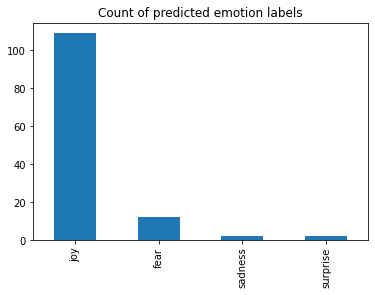

In [19]:
em_preds = nlu.load('emotion').predict(df['reviwe_translated_original'],output_level='document')
em_preds['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')

In [34]:
em_joy = df[df['emotion'] == 'joy']
em_fear = df[df['emotion'] == 'fear']
em_sadness = df[df['emotion'] == 'sadness']
em_surprise = df[df['emotion'] == 'surprise']


em_joy['review'].to_csv('em_joy')
em_fear['review'].to_csv('em_fear')
em_sadness['review'].to_csv('em_sadness')
em_surprise['review'].to_csv('em_surprise')

## Sentiment

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


<AxesSubplot:title={'center':'Count of predicted sentiment labels'}>

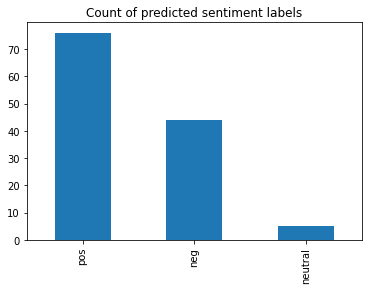

In [20]:
senti_preds = nlu.load('sentiment').predict(df['reviwe_translated_original'],output_level='document')
senti_preds['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

In [15]:
senti_predictions[senti_predictions['sentiment'] == 'neg']

,document,sentence_embedding_converter,sentiment,sentiment_confidence,word_embedding_glove
0,Working Hours/Holidays/Holidays: It's up to yo...,"[-0.1625371128320694, 0.17526309192180634, 0.2...",neg,0.0,"[[0.07655200362205505, 0.1784300059080124, -0...."
2,Salary system: 80% of the assumed annual incom...,"[-0.08981514722108841, 0.2624017298221588, 0.3...",neg,0.0,"[[0.31984999775886536, 0.35361000895500183, 0...."
4,Welfare: There is a good cafeteria in the offi...,"[-0.16028429567813873, 0.27730605006217957, 0....",neg,0.0,"[[0.03984199836850166, 0.7076900005340576, -0...."
5,Working Hours/Holiday Leave: Work-life balance...,"[-0.16432304680347443, 0.18839536607265472, 0....",neg,0.0,"[[0.07655200362205505, 0.1784300059080124, -0...."
6,Working Hours/Holidays/Holidays: It's up to yo...,"[-0.16978716850280762, 0.1810106486082077, 0.2...",neg,0.0,"[[0.07655200362205505, 0.1784300059080124, -0...."
8,Salary system: Base + Incentive is the basic b...,"[-0.10855091363191605, 0.2403387427330017, 0.3...",neg,0.0,"[[0.31984999775886536, 0.35361000895500183, 0...."
13,Welfare program: There is no housing subsidy a...,"[-0.13400742411613464, 0.23691396415233612, 0....",neg,0.0,"[[0.03984199836850166, 0.7076900005340576, -0...."
23,"Welfare: I think that I am very blessed, such ...","[-0.12262790650129318, 0.19563549757003784, 0....",neg,0.0,"[[0.03984199836850166, 0.7076900005340576, -0...."
25,Salary system: If you give a square number to ...,"[-0.13748903572559357, 0.26665687561035156, 0....",neg,0.0,"[[0.31984999775886536, 0.35361000895500183, 0...."
26,Salary system: I think that it is good because...,"[-0.08885053545236588, 0.25714313983917236, 0....",neg,0.0,"[[0.31984999775886536, 0.35361000895500183, 0...."


In [22]:
df['sentiment'] = senti_preds['sentiment']
df['emotion'] = em_preds['emotion']

In [27]:
df.head(2)

,reviewer_info,title,rating,review,year,review_translated,reviwe_translated_original,sentiment,emotion
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...,neg,joy
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...,pos,joy


In [35]:
senti_neg = df[df['sentiment'] == 'neg']
senti_neutral = df[df['sentiment'] == 'neutral']
senti_pos = df[df['sentiment'] == 'pos']

senti_neg['review'].to_csv('sentiment_neg')
senti_neutral['review'].to_csv('sentiment_neutral')
senti_pos['review'].to_csv('sentiment_pos')